# Facial Emotion Recognition using CNNs on FER-2013 Dataset

# Author: Abd Ur Rehman
# Date: 12_01_2024


# Project Purpose

## Objective:
### Develop a Facial Emotion Recognition model using Convolutional Neural Networks (CNNs) to classify facial emotions
### into one of seven categories (Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral) using the FER-2013 dataset.

## Dataset:
### The FER-2013 dataset consists of 35,887 grayscale images (48x48 pixels) categorized into 7 different emotions.
### This dataset provides a rich source of labeled facial expressions for training the CNN model.

## Key Tasks:
### 1. Data Preprocessing: Load, clean, and preprocess the images, one-hot encode the labels.
### 2. Model Building: Construct a CNN-based neural network for image classification.
### 3. Model Training: Train the model on the FER-2013 dataset to learn patterns in facial expressions.
### 4. Evaluation: Assess the model's accuracy and performance using test data, visualize accuracy and loss graphs.
### 5. Application: Implement a prediction function to classify emotions from new images.

## Expected Outcome:
### By the end of this project, we aim to have a functional Facial Emotion Recognition model capable of classifying 
### facial expressions into one of seven emotions. This model could serve as a foundation for applications such as 
### emotion detection in video surveillance, human-computer interaction, or emotional AI.


## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Load the FER-2013 dataset

In [2]:

data = pd.read_csv('fer2013.csv')


## Data Preprocessing

In [3]:
# Reshape the image data and normalize pixel values
x = np.array([np.fromstring(image, sep=' ').reshape(48, 48, 1) for image in data['pixels']])
y = to_categorical(data['emotion'], num_classes=7)

In [4]:
# Normalize the pixel values to range [0, 1]
x = x / 255.0

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
# Print the shape of the data
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')

Training data shape: (28709, 48, 48, 1)
Testing data shape: (7178, 48, 48, 1)


## Build the CNN model

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(7, activation='softmax')  # 7 classes for 7 emotions
])

2024-08-28 10:04:04.342333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-28 10:04:04.421457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-28 10:04:04.421967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-28 10:04:04.425755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Compile the model

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Print model summary

In [9]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

## Train the model

In [11]:

epochs = 50
batch_size = 64
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))



Epoch 1/50


2024-08-28 10:06:04.735440: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


449/449 [==============================] - 44s 86ms/step - loss: 1.7486 - accuracy: 0.2885 - val_loss: 1.5850 - val_accuracy: 0.3729
Epoch 2/50
449/449 [==============================] - 38s 84ms/step - loss: 1.5310 - accuracy: 0.4071 - val_loss: 1.4538 - val_accuracy: 0.4576
Epoch 3/50
449/449 [==============================] - 37s 83ms/step - loss: 1.4090 - accuracy: 0.4614 - val_loss: 1.3300 - val_accuracy: 0.4964
Epoch 4/50
449/449 [==============================] - 38s 84ms/step - loss: 1.3347 - accuracy: 0.4914 - val_loss: 1.2732 - val_accuracy: 0.5223
Epoch 5/50
449/449 [==============================] - 37s 83ms/step - loss: 1.2751 - accuracy: 0.5148 - val_loss: 1.2430 - val_accuracy: 0.5270
Epoch 6/50
449/449 [==============================] - 39s 87ms/step - loss: 1.2315 - accuracy: 0.5325 - val_loss: 1.2209 - val_accuracy: 0.5389
Epoch 7/50
449/449 [==============================] - 37s 83ms/step - loss: 1.1856 - accuracy: 0.5518 - val_loss: 1.1968 - val_accuracy: 0.5500
Epo

## Save the trained model

In [12]:

model.save('emotion_recognition_model.h5')

## Evaluate the model

In [13]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

225/225 [==============================] - 4s 17ms/step - loss: 2.3327 - accuracy: 0.5731
Test Loss: 2.3326799869537354
Test Accuracy: 0.5731401443481445


## Plot the accuracy and loss graphs

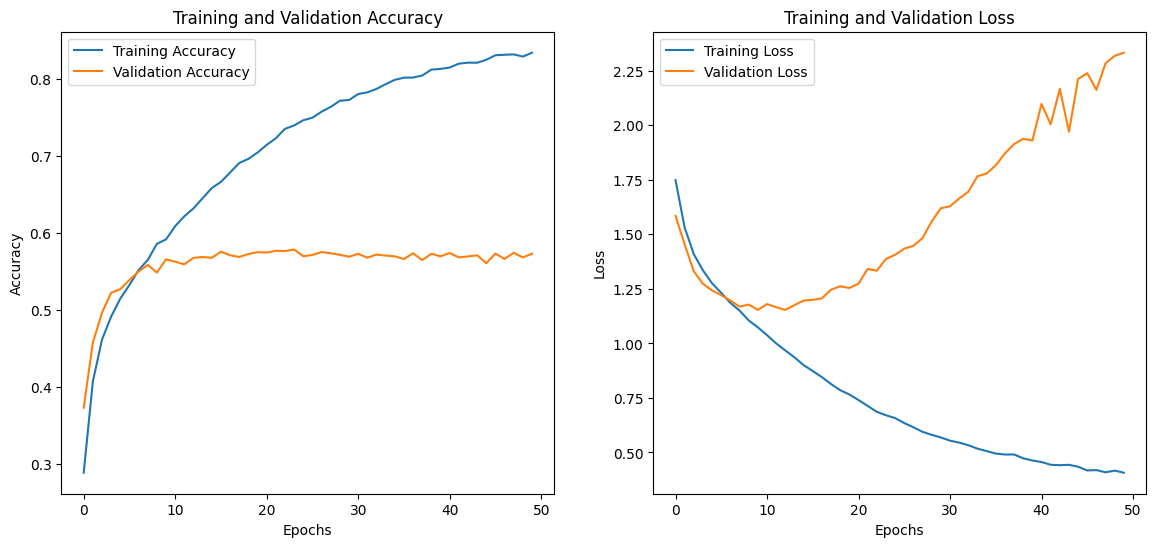

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')

plt.show()

## Confusion Matrix

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

225/225 [==============================] - 3s 14ms/step


## Print the classification report

In [16]:

print(classification_report(y_true, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']))


              precision    recall  f1-score   support

       Angry       0.48      0.51      0.49       985
     Disgust       0.78      0.39      0.52       102
        Fear       0.47      0.35      0.40      1043
       Happy       0.78      0.77      0.77      1765
         Sad       0.43      0.51      0.47      1210
    Surprise       0.73      0.69      0.71       795
     Neutral       0.51      0.53      0.52      1278

    accuracy                           0.57      7178
   macro avg       0.60      0.54      0.55      7178
weighted avg       0.58      0.57      0.57      7178



## Plot confusion matrix

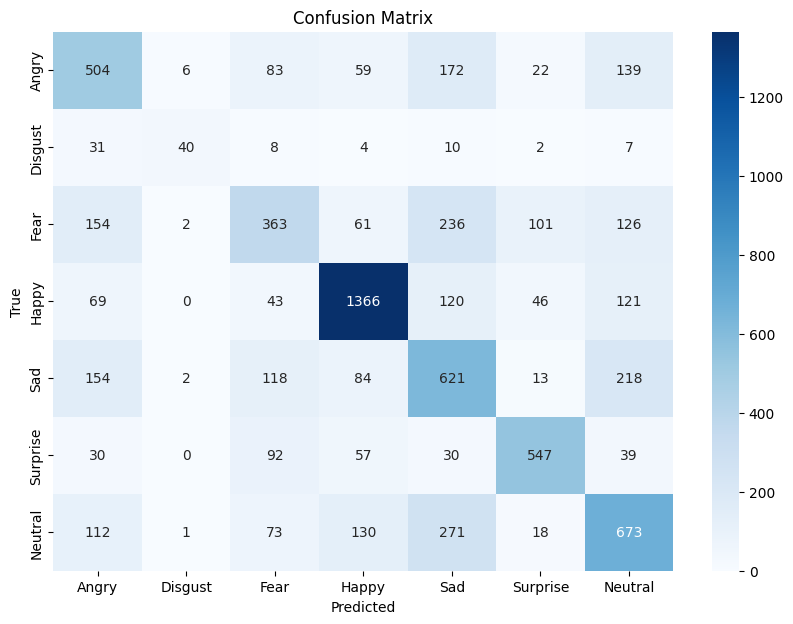

In [17]:

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], yticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Prediction Function

In [18]:

def predict_emotion(model, img):
    """
    Predicts the emotion of a given image.

    Parameters:
    model -- trained CNN model
    img -- image to be predicted, in the shape (48, 48, 1)

    Returns:
    The predicted emotion as a string
    """
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize
    
    # Predict emotion
    predictions = model.predict(img)
    emotion_index = np.argmax(predictions)
    
    # Emotion labels
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    return emotions[emotion_index]

## Example usage of the prediction function

In [19]:

sample_img = x_test[0]  # Choose a sample image from the test set
predicted_emotion = predict_emotion(model, sample_img)
print(f'Predicted emotion: {predicted_emotion}')

1/1 [==============================] - 0s 266ms/step
Predicted emotion: Angry
